# Problem 1
Write a function that list all the possible outcomes with five dice.

In [1]:
allRolls5Dice = lambda : [[a+1,b+1,c+1,d+1,e+1] for a in range (6)\
                                                for b in range (6)\
                                                for c in range (6)\
                                                for d in range (6)\
                                                for e in range (6)]

# Problem 2
Write a function that takes a number of dices and return all the possible outcomes for that amount of dices.


In [2]:
allRollsNDices = lambda n: [[a+1]+smallerRoll for a in range(6) for smallerRoll in allRollsNDices(n-1)] if n > 1 else [[a+1] for a in range(6)]

# Problem 3

Write functions that return, given five dice, True or False if we have Straight, Full, Poker or Generala. 


In [3]:
isStraight = lambda roll: True if len(set(roll)) == len(roll) else False

isFull = lambda roll: True if roll.count(min(roll)) == 3 and roll.count(max(roll)) == 2 or \
                              roll.count(min(roll)) == 2 and roll.count(max(roll)) == 3 else False

isPoker = lambda roll: True if roll.count(min(roll)) == 4 and roll.count(max(roll)) == 1 or \
                              roll.count(min(roll)) == 1 and roll.count(max(roll)) == 4 else False

isGenerala = lambda roll: True if len(set(roll)) == 1 else False

# Problem 4
Compute the probabilities that you already computed by hand by counting the outcomes describing each roll result in the list of all possible hands served.


In [4]:
p_served_straigth = len([roll for roll in allRolls5Dice() if isStraight(roll)]) / float(len(allRolls5Dice()))
print( p_served_straigth )

0.09259259259259259


In [5]:
p_served_full = len([roll for roll in allRolls5Dice() if isFull(roll)]) / float(len(allRolls5Dice()))
print( len([roll for roll in allRolls5Dice() if isFull(roll)]) / float(len(allRolls5Dice())) )

0.038580246913580245


In [6]:
p_served_poker = len([roll for roll in allRolls5Dice() if isPoker(roll)]) / float(len(allRolls5Dice()))
print( p_served_poker )

0.019290123456790122


In [7]:
p_served_generala = len([roll for roll in allRolls5Dice() if isGenerala(roll)]) / float(len(allRolls5Dice()))
print( p_served_generala )

0.0007716049382716049


# Problem 5
Compute the probabilities that you already computed by hand by counting the outcomes describing each roll result in the list of all possible hands.

In [14]:
notServedGeneralas = [roll for roll in allRolls5Dice() if not isGenerala(roll)]

waysOfChooseFromFiveDice = 6 + 6*5 + 6*5*4 + 6*5*4*3 + 6*5*4*3*2

unUnsefulPickUpsCount = 0
usefulPickUps = []
for notServedGenerala in notServedGeneralas:
    for diceType in set(notServedGenerala):
        usefulPickUp = [dice for dice in notServedGenerala if dice == diceType]
        usefulPickUps.append(usefulPickUp)
        
        unUnsefulPickUpsCount += waysOfChooseFromFiveDice - len(usefulPickUp)
        
print (len (usefulPickUps), unUnsefulPickUpsCount)

27900 34445550


In [15]:
generalaCountAfterReroll = 0
notGeneralaCountAfterReroll = 0
for usefulPickUp in usefulPickUps:
    for reroll in allRollsNDices(5-len(usefulPickUp)):
        if isGenerala(usefulPickUp+reroll): generalaCountAfterReroll += 1
        else: notGeneralaCountAfterReroll += 1
        
print (generalaCountAfterReroll, notGeneralaCountAfterReroll)

27900 25947000


In [18]:
p_generada_after_two_rolls = p_served_generala + ( generalaCountAfterReroll / (notGeneralaCountAfterReroll + unUnsefulPickUpsCount) )
print (p_generada_after_two_rolls)

0.0012335824503985145


# Problem 6
Write a function that plays automatically, always looking for a Generala with a greedy strategy (always keeping the most dices of the same kind and rolling the others) that returns True if we get a Generala and a False otherwise. Which kind of distribution follow this function results? Explain your reasoning within the delivered python notebook.


In [34]:
from random import random

randomDice = lambda : int(random() * 6 + 1)

[4, 2]

[2, 3, 2, 1, 5, 2, 5, 1, 5, 2, 6, 3, 2, 2, 1, 1, 1, 2, 3, 4, 1, 1, 2, 4, 6, 4, 1, 6, 6, 5, 2, 4, 1, 3, 5, 5, 4, 6, 6, 5, 3, 5, 4, 2, 2, 3, 3, 3, 6, 3, 5, 1, 6, 6, 3, 2, 6, 3, 1, 6, 3, 2, 6, 6, 3, 5, 5, 3, 4, 2, 4, 1, 6, 3, 1, 1, 2, 1, 1, 3, 5, 6, 1, 2, 6, 3, 2, 4, 1, 4, 4, 1, 5, 6, 6, 5, 6, 2, 6, 3, 1, 6, 5, 6, 2, 2, 6, 1, 4, 3, 1, 4, 3, 2, 6, 5, 5, 6, 4, 5, 1, 1, 4, 3, 5, 4, 1, 3, 5, 6, 2, 2, 2, 1, 3, 4, 2, 3, 6, 2, 6, 4, 1, 2, 2, 3, 4, 1, 4, 4, 6, 2, 5, 2, 2, 6, 5, 2, 3, 6, 5, 5, 5, 1, 2, 6, 3, 6, 3, 4, 1, 1, 6, 1, 4, 5, 5, 3, 1, 4, 2, 5, 2, 6, 3, 1, 2, 5, 2, 6, 6, 6, 5, 5, 4, 6, 1, 1, 2, 4, 3, 2, 3, 2, 2, 4, 6, 1, 2, 6, 4, 5, 1, 3, 2, 4, 1, 1, 4, 4, 5, 1, 6, 3, 5, 4, 1, 5, 5, 4, 3, 1, 6, 1, 1, 3, 5, 2, 5, 5, 4, 3, 5, 1, 1, 1, 3, 5, 4, 5, 3, 4, 3, 1, 1, 2, 6, 2, 2, 4, 4, 5, 1, 6, 4, 2, 6, 5, 1, 6, 1, 4, 4, 1, 6, 1, 1, 5, 6, 5, 6, 4, 5, 5, 2, 3, 1, 6, 3, 4, 1, 1, 1, 3, 3, 6, 6, 1, 4, 6, 1, 6, 3, 4, 5, 3, 4, 6, 1, 2, 2, 4, 6, 1, 3, 3, 6, 1, 1, 3, 3, 2, 4, 2, 4, 1, 6, 1, 4, 1, 1, 1, 2, 

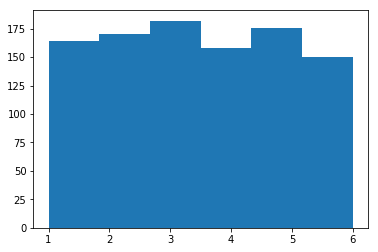

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt 

plt.hist([randomDice() for i in range(1000)], bins = 6)
print ([randomDice() for i in range(1000)])

In [115]:
def Play():
    firstRoll = [randomDice(),randomDice(),randomDice(),randomDice(),randomDice()]
    if isGenerala(firstRoll):
        return True
    else:
        appearings = [firstRoll.count(i) for i in range(1,7)]
        diceMaxAppearing = appearings.index(max(appearings))+1
        keptHand = [diceMaxAppearing] * max(appearings)
        
        secondRoll = keptHand
        while len(secondRoll) < 5:
            secondRoll.append(randomDice())
        
        if isGenerala(secondRoll): 
            return True
        else:
            appearings = [secondRoll.count(i) for i in range(1,7)]
            diceMaxAppearing = appearings.index(max(appearings))+1
            keptHand = [diceMaxAppearing] * max(appearings)

            thirdRoll = keptHand
            
            while len(thirdRoll) < 5:
                thirdRoll.append(randomDice())
        
        return isGenerala(thirdRoll)

In [116]:
Play()

False

# Problem 8
Write a function that plays until it gets a Generala, count how many times it had to play to get it and return this number. Which kind of distribution follow this function results? Explain your reasoning within the delivered python notebook.


In [117]:
def PlayUntilGenerala():
    timesPlayed = 1
    while not Play():
        timesPlayed+=1
    return timesPlayed

In [118]:

sampleOfDistribution = []

for attempt in range(10000):
    sampleOfDistribution.append(PlayUntilGenerala())
    

(array([2.170e+03, 1.631e+03, 1.301e+03, 1.085e+03, 7.770e+02, 6.290e+02,
        4.350e+02, 4.030e+02, 3.140e+02, 2.340e+02, 1.890e+02, 1.910e+02,
        1.420e+02, 8.500e+01, 9.200e+01, 6.900e+01, 5.100e+01, 3.700e+01,
        4.000e+01, 2.800e+01, 1.800e+01, 1.700e+01, 1.400e+01, 1.100e+01,
        1.100e+01, 7.000e+00, 2.000e+00, 3.000e+00, 3.000e+00, 3.000e+00,
        1.000e+00, 3.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([  1.  ,   5.85,  10.7 ,  15.55,  20.4 ,  25.25,  30.1 ,  34.95,
         39.8 ,  44.65,  49.5 ,  54.35,  59.2 ,  64.05,  68.9 ,  73.75,
         78.6 ,  83.45,  88.3 ,  93.15,  98.  , 102.85, 107.7 , 112.55,
        117.4 , 122.25, 127.1 , 131.95, 136.8 , 141.65, 146.5 , 151.35,
        156.2 , 161.05, 165.9 , 170.75, 175.6 , 180.45, 185.3 , 190.15,
        195.  ]),
 <a list of 40 Patch objects>)

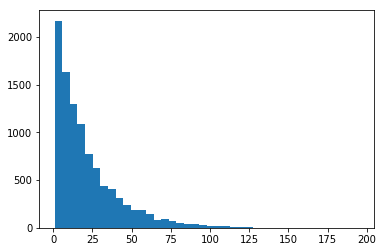

In [121]:
plt.hist(sampleOfDistribution, bins=40)